<a href="https://colab.research.google.com/github/Thuoq/Gear-Inc-Scam/blob/main/GearIncScam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Thuoq/Gear-Inc-Scam.git
%cd Gear-Inc-Scam

Cloning into 'Gear-Inc-Scam'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (274/274), done.
remote: Total 423 (delta 145), reused 422 (delta 144), pack-reused 0
Receiving objects: 100% (423/423), 267.47 MiB | 31.45 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Checking out files: 100% (57/57), done.
/content/Gear-Inc-Scam


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.1 MB 8.2 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 1.4 MB 44.6 MB/s 
     |████████████████████████████████| 111 kB 53.5 MB/s 
     |████████████████████████████████| 929 kB 52.7 MB/s 
     |████████████████████████████████| 97 kB 7.9 MB/s 
     |████████████████████████████████| 3.6 MB 44.9 MB/s 
ERROR: Could not find a version that satisfies the requirement dataclasses==0.8 (from versions: 0.1, 0.2, 0.3, 0.4, 0.5, 0.6)
ERROR: No matching distribution found for dataclasses==0.8


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def resize_image(im, max_size=768):
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
       
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)
    return im

In [5]:
from models.detector import face_detector

In [6]:
fd = face_detector.FaceAlignmentDetector(
    lmd_weights_path="./models/detector/FAN/2DFAN-4_keras.h5"# 2DFAN-4_keras.h5, 2DFAN-1_keras.h5
)

In [7]:
from models.verifier.face_verifier import FaceVerifier

In [8]:
fv = FaceVerifier(classes=512, extractor="facenet") # extractor="insightface"

Instructions for updating:
Use fn_output_signature instead


In [9]:
fv.set_detector(fd)

In [10]:
def result_face_verify_obj(src_path,target_path):
    src = cv2.imread(src_path)[..., ::-1]
    src = resize_image(src) # Resize image to prevent GPU OOM.
    target = cv2.imread(target_path)[..., ::-1]
    target = resize_image(target) # Resize image to prevent GPU OOM.

    # Face verification
    result, distance = fv.verify(src, target, threshold=0.5, with_detection=True, with_alignment=False, return_distance=True)
    return src,target,result, distance

In [11]:
def plot_after_result(src,target,result,distance,src_path):
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    title =  src_path.split('.')[len(src_path.split('.'))-2]
    plt.title(title)
    plt.imshow(src)
    plt.subplot(1,3,2)
    plt.title(f"Same person: {str(result)}\n Cosine distance: {str(round(distance, 2))}")
    plt.imshow(target)

Saving Screen Shot 2022-02-22 at 21.22.39.png to Screen Shot 2022-02-22 at 21.22.39.png


/content/Gear-Inc-Scam/models/detector/s3fd/s3fd_detector.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bboxlist = np.array(bboxlist)
/content/Gear-Inc-Scam/models/detector/face_detector.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return [np.array([bbox[1], bbox[0], bbox[3], bbox[2], bbox[4]]) for bbox in bbox_list]


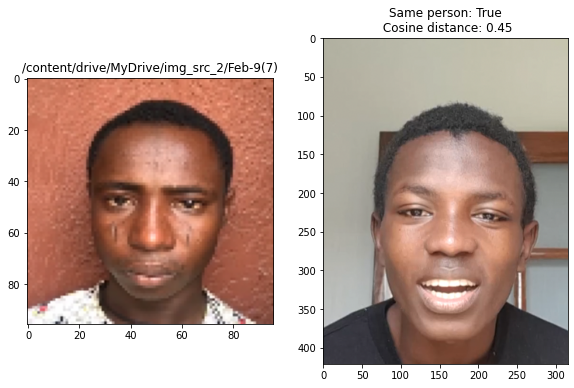

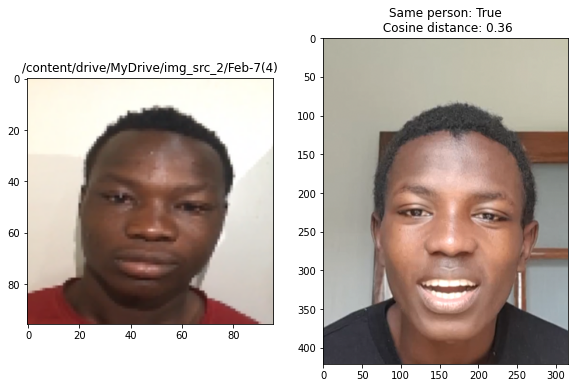

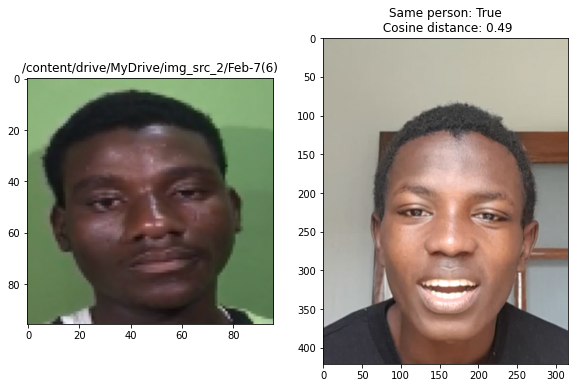

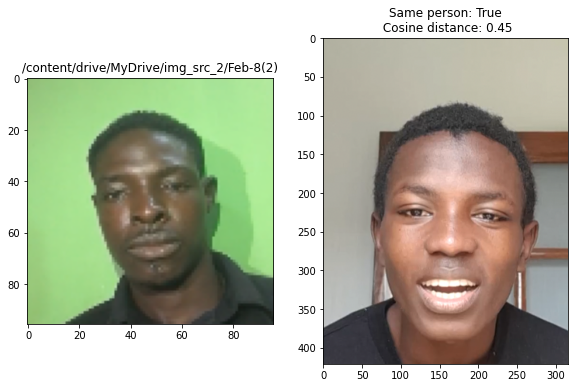

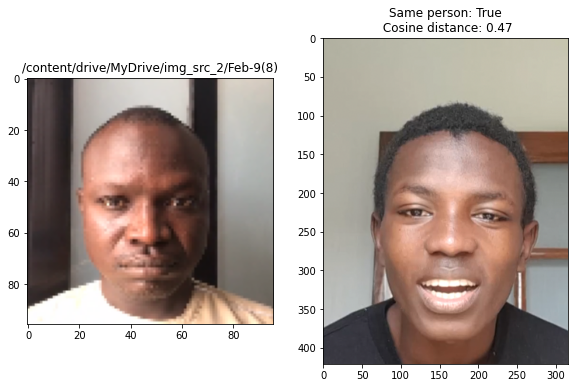

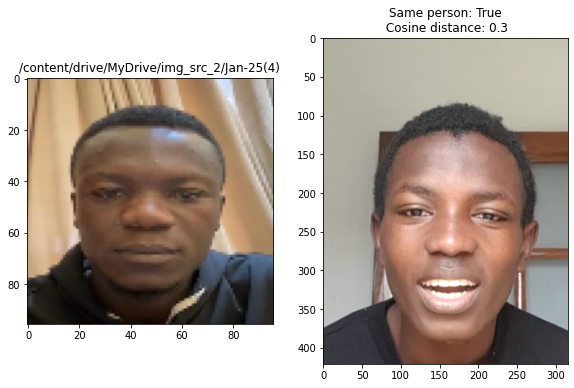

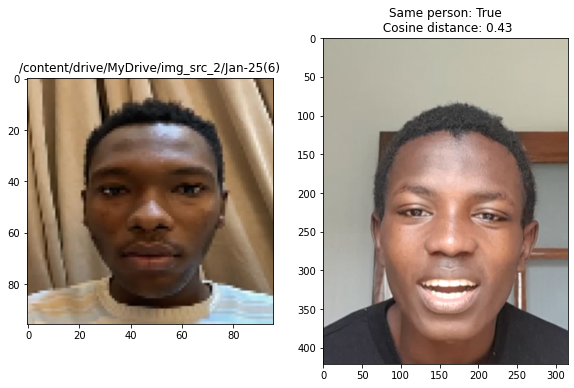

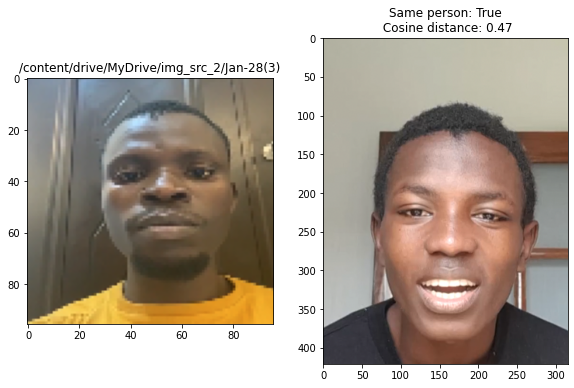

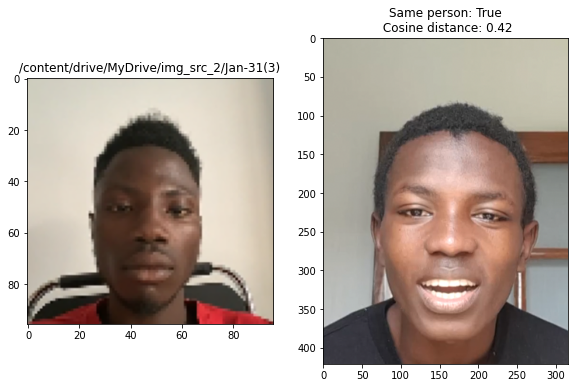

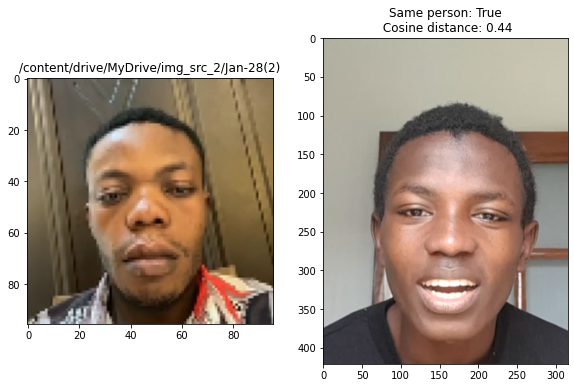

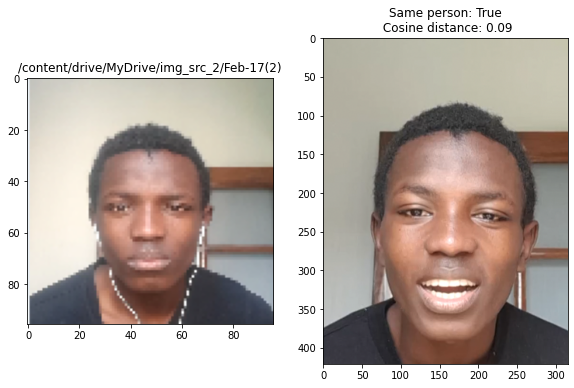

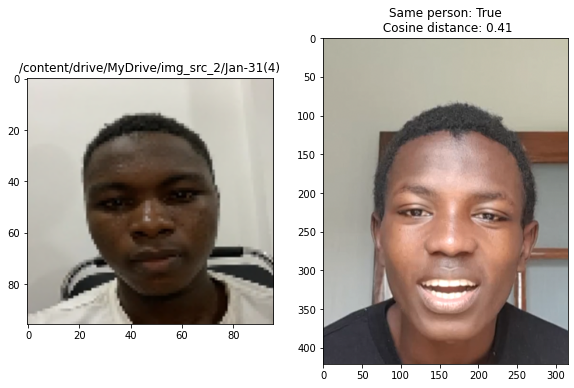

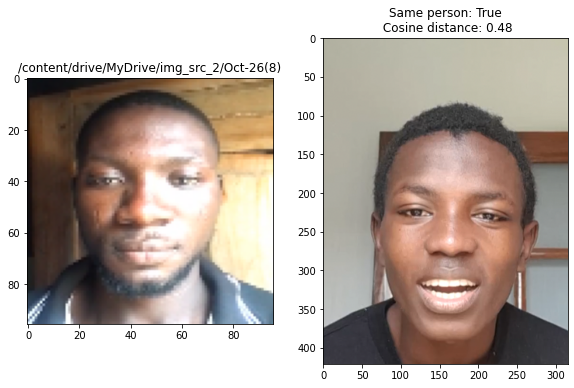

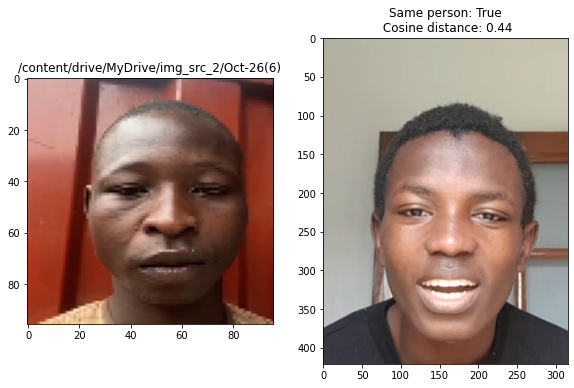

In [12]:
import os 
from google.colab import files
PATH = "/content/drive/MyDrive/img_src_2/"
dirs = os.listdir(PATH)
upload_file = files.upload()
if upload_file:
  target_path=  list(upload_file.keys())[0]
  for file in dirs:
      if file.split('.')[1] == "png":
          src_path= PATH + file
          src,target,result, distance= result_face_verify_obj(src_path,target_path)
          if result : # laay 65%
              plot_after_result(src,target,result,distance,src_path)